# Part I - Exploratory Data Analysis of Loan Data from Prosper
## by Benjamin Onyenekwe

## Introduction
This data exploration looks into the interactions of 12 features in the Prosper loan data. It considers the impact, 11 of those variables have on Borrower's Annual Percentage Rate (APR). Prosper loan data set, contains 113,937 loans (records), made up of 81 variables (fields) on each loan. The variables include BorrowerAPR, LenderYield, BorrowerState, CreditScoreRange (Upper and Lower) and others. This data exploration focuses on chosen varaiables of interest from the data set, for investigation through visual analysis. Structure of the dataset, chosen target feature, and features of interest being invesitgated are stated below in respective subheadings.

Borrower Annual Percentage Rate (BorrowerAPR), according to bankbazaar [webpage](https://www.bankbazaar.com/personal-loan/annual-percentage-rate-vs-interest-rate.html), *"refers to the annual rate that a borrower will need to pay as he or she is borrowing the funds. This rate is expressed in the form of a percentage and it indicates the original annual cost of funds over the period of a particular loan."* APR is the expense incured from a loan expressed as a interest rate. It could be fixed or vairable. When fixed for a loan, it stays the same through the loan tenure while a variable APR changes during the loan tenure, based on some factors.

APR includes both the loan interest and other fees charged for the loan. Fees can include loan insurance and closing cost. A loan with no other fee, has it's interest rate and APR as the same. Unlike the APR, the loan interest rate begins at the time of loan closing, although there is no standard time of closing across loan inssuers. For borrowers, an APR that is close to *zero percent* is a good deal.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import my_user_functions as muf

%matplotlib inline

_in-page custom functions_

In [2]:
def plt_title(title):
    """Function formats Pyplot title
    Arguments:
        title: title of plot
    """
    plt.title(title, y = 1.05, fontsize = 14, weight = 'bold')



def violin_bar(df, xVar, yVar, order=None, color=sb.color_palette()[0], lim=(0.000, 0.400), stat='median', kind='quartile', annot_color = 'black', tight = False, xtick_rot = None):
    """Custom function: plots violin and aggregated bar plot in two subplots with bar annotations.
    Left subplot contains violin plot, while right subplot contains aggregated bar plot.
    
    Arguemnts:
        df: dataframe
        xVar: x-axis variable name
        yVar: y-axis variable name
        order: category variable order
        color: seaborn color palette
        lim: y-axis limit turple
        stat: aggregate type - Median, Mean, Sum, etc.
        kind: violin plot inner parameter - quartile, line, etc.
        annot_color: bar annotation text color
        tight: subplot spacing - True or False
        xtick_rot: numeric xticks rotation value
    """
    
    # plot relationship between {xVar} and {yVar}
    fig, ax = plt.subplots(2, 2, figsize = [14, 4])
    
    # left plot
    plt.subplot(1, 2, 1)
    sb.violinplot(data = df, x = xVar, y = yVar,
                  inner = kind, order = order, color = color)
    plt.title(f'Relationship between {xVar} and {yVar}',
              y = 1.05, fontsize = 14, weight = 'bold')
    plt.xlabel(xVar, fontsize = 12)
    plt.xticks(rotation = xtick_rot)
    plt.ylabel(f'{yVar} (%/100)', fontsize = 12)
    
    # right plot
    plt.subplot(1, 2, 2)
    aggr_df = df.groupby(xVar).agg(stat)[yVar].reset_index()
    g = sb.barplot(data = aggr_df, x = xVar, y = yVar, order = order, color = color)
    
    # create bar annotations
    for bar in g.patches:
        g.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()*100:.2f}%',
               color = annot_color, ha = 'center', va = 'bottom')
        
    plt.title(f'{stat} {yVar} per {xVar}'.title(),
              y = 1.05, fontsize = 14, weight = 'bold')
    plt.xlabel(xVar, fontsize = 12)
    plt.xticks(rotation = xtick_rot)
    plt.ylabel('')
    plt.box(False)
    plt.tick_params(labelleft = False, left = False)
    plt.ylim(lim)
    
    if tight:
        fig.tight_layout()
        
    plt.show()

In [3]:
# load dataset and display first 3 rows
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


To start with, property of the data set is observed to understand their respective data types and the completeness of columns.

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Dataset Structure
The dataset contains 113,937 entries and 81 columns. According to the dataset description [online](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0), some columns like CreditGrade had their collection ended pre-2009 while columns such as TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments and a couple others had their data collection starting from July 2009. This is observed in thier entry number not up to the other columns in the dataset. There other columns with missing entries as a result of unavailable data from the customers. This as stated in the dataset description.

The dataset is made of Object, Integer, Float and Boolean data types. It should be noted that some of the columns having object datatypes are actually ordered categorical variables, while others nominal categorical variables.

### Main feature of interest in Dataset
This exploration focuses on what observable influence other features have on the Borrower Annual Percentage Rate (APR) feature in Prosper loans. The main feature of interest - the target variable, is `BorrowerAPR`.

The explorations considers if the features of interest mentioned below have observable effect on the BorrowerAPR.

### Features to help support the investigation
The features (dataset columns) below have been chosen to support the investigation of BorrowerAPR, in this data exploration project. Each variable has been chosen based on interest to know how they affect prosper loan Borrower Annual Percentage Rate (APR). Aslo, the data the selected features contained can be gathered by a potential borrower for decision making. Data description of each, as stated in the data description file [online](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0), is also added to help intuition.

<table>
  <tr >
    <th style="width:20%">Feature (variable)</th> <th>Description</th>
  </tr>
  <tr>
    <td>Term</td> <td>The length of the loan expressed in months.</td>
  </tr>
  <tr>
    <td>BorrowerAPR</td> <td>The Borrower's Annual Percentage Rate (APR) for the loan.</td>
  </tr>
  <tr>
    <td>LenderYield</td> <td>The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.</td>
  </tr>
  <tr>
    <td>BorrowerState</td> <td>The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.</td>
  </tr>
  <tr>
    <td>EmploymentStatus</td> <td>The employment status of the borrower at the time they posted the listing.</td>
  </tr>
  <tr>
    <td>IsBorrowerHomeowner</td> <td>A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.</td>
  </tr>
  <tr>
    <td>CreditScoreRangeLower</td> <td>The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.</td>
  </tr>
  <tr>
    <td>CreditScoreRangeUpper</td> <td>The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. </td>
  </tr>
  <tr>
    <td>IncomeRange</td> <td>The income range of the borrower at the time the listing was created.</td>
  </tr>
  <tr>
    <td>IncomeVerifiable</td> <td>The borrower indicated they have the required documentation to support their income.</td>
  </tr>
  <tr>
    <td>TotalProsperLoans</td> <td>Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.</td>
  </tr>
  <tr>
    <td>Recommendations</td> <td>Number of recommendations the borrower had at the time the listing was created.</td>
  </tr>
</table>

#### Data Cleaning

To save compute resource and aid better data visualization, data cleaning that includes droping of not needed columns and empty rows, changing of data types and other forms of data wrangling is performed below. Folowed by an overview of the final dataframe that visual exploration will be performed on.

In [5]:
# make copy of dataframe before cleaning
loans = df.copy()

In [6]:
# check for duplicate records using loankey column
sum(loans.duplicated(subset = 'LoanKey'))

871

In [7]:
# drop duplicates
loans = loans.drop_duplicates(subset = 'LoanKey')

# check
sum(loans.duplicated(subset = 'LoanKey'))

0

In [8]:
# slice needed columns
useful_cols = ['Term', 'BorrowerAPR', 'LenderYield', 'BorrowerState',
               'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
               'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable',
               'TotalProsperLoans', 'Recommendations']
loans = loans[useful_cols]

In [9]:
# view dataframe info
loans.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Term                   113066 non-null  int64  
 1   BorrowerAPR            113041 non-null  float64
 2   LenderYield            113066 non-null  float64
 3   BorrowerState          107551 non-null  object 
 4   EmploymentStatus       110811 non-null  object 
 5   IsBorrowerHomeowner    113066 non-null  bool   
 6   CreditScoreRangeLower  112475 non-null  float64
 7   CreditScoreRangeUpper  112475 non-null  float64
 8   IncomeRange            113066 non-null  object 
 9   IncomeVerifiable       113066 non-null  bool   
 10  TotalProsperLoans      21923 non-null   float64
 11  Recommendations        113066 non-null  int64  
dtypes: bool(2), float64(5), int64(2), object(3)
memory usage: 9.7+ MB


A look at `EmploymentStatus` variable indicates an entry 'Not available' and NAN among the classifications. These two terms logically imply the same thing. So all entries containing 'Not available' are replaced with NAN. 

In [10]:
# view column unique values
loans.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [11]:
# replace 'Not available' with NAN
loans.EmploymentStatus = loans.EmploymentStatus.replace('Not available', np.nan)

# verify replacement
loans.EmploymentStatus.unique()

array(['Self-employed', 'Employed', nan, 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

Column `IncomeRange` contains classification that includes: 'Not employed', which by implication means zero income; 'Not displayed', which might or might not have income; also '\\$0'. It makes better sense to have records of the classification 'Not displayed' removed, then class 'Not employed' as '\\$0' by replacing the entries. The column also has a data type of object but needs to be in an ordered category for proper visualization order. The unique values are displayed belowed, before the changes mentioned here are effected.

In [12]:
list(loans.IncomeRange.unique())

['$25,000-49,999',
 '$50,000-74,999',
 'Not displayed',
 '$100,000+',
 '$75,000-99,999',
 '$1-24,999',
 'Not employed',
 '$0']

In [13]:
# slice out records where IncomeRange is "Not displayed"
loans = loans.query('IncomeRange != "Not displayed"')

In [14]:
# Replace 'Not employed' with '$0'
loans.loc[:,'IncomeRange'] = loans.IncomeRange.replace('Not employed', '$0')

# verify
list(loans.IncomeRange.unique())

['$25,000-49,999',
 '$50,000-74,999',
 '$100,000+',
 '$75,000-99,999',
 '$1-24,999',
 '$0']

In [15]:
# create IncomeRange ordered class
IncomeRange_list = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
IncomeRangeClass = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_list)
loans.IncomeRange = loans.IncomeRange.astype(IncomeRangeClass)

# verify
loans.IncomeRange.dtype

CategoricalDtype(categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                  '$75,000-99,999', '$100,000+'],
, ordered=True)

The `TotalProsperLoans` column is short of 91,852 entries which, as stated in the data description, imply those who do not have prosper loan at the time the listing was created. A look at the unique variables of this column indicate there is a zero class among the other classifications. Therefore, all null entries will be classified as zero. Also the column data type will be changed from float to integer since there are no fractions.

In [16]:
# check column unique values
loans.TotalProsperLoans.unique()

array([nan,  1.,  3.,  2.,  4.,  6.,  5.,  8.,  7.,  0.])

In [17]:
# replace null entries with 0 in TotalProsperLoans and change data type to integer
loans.TotalProsperLoans = loans.TotalProsperLoans.fillna(0).astype(int)

# check for NAN
loans.TotalProsperLoans.isna().sum()

0

To ensure completeness and limit bias, remaining rows with NAN entries are dropped

In [18]:
loans = loans.dropna()
loans.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103623 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Term                   103623 non-null  int64   
 1   BorrowerAPR            103623 non-null  float64 
 2   LenderYield            103623 non-null  float64 
 3   BorrowerState          103623 non-null  object  
 4   EmploymentStatus       103623 non-null  object  
 5   IsBorrowerHomeowner    103623 non-null  bool    
 6   CreditScoreRangeLower  103623 non-null  float64 
 7   CreditScoreRangeUpper  103623 non-null  float64 
 8   IncomeRange            103623 non-null  category
 9   IncomeVerifiable       103623 non-null  bool    
 10  TotalProsperLoans      103623 non-null  int32   
 11  Recommendations        103623 non-null  int64   
dtypes: bool(2), category(1), float64(4), int32(1), int64(2), object(2)
memory usage: 7.8+ MB


Since `CreditScoreRangeLower`, and `CreditScoreRangeUpper` contain no fraction as shown below, their data type are changed from float to integer.

In [19]:
# check for an entry with fraction in columns
col_list = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
for col in col_list:
    print(f"{col} contains fraction" if muf.has_fraction(loans[col].tolist()) else f"{col} has no fraction")

CreditScoreRangeLower has no fraction
CreditScoreRangeUpper has no fraction


In [20]:
# change columns data type to integer
for col in col_list:
    if not muf.has_fraction(loans[col].tolist()):
        loans[col] = loans[col].astype(int)

In [21]:
# check data type of columns is integer
for col in col_list:
    print(f"{col} : {loans[col].dtype}")

CreditScoreRangeLower : int32
CreditScoreRangeUpper : int32


An overview of the cleaned data that will be explored is presented below

In [22]:
muf.data_overview(loans)

Dataframe has 103623 rows and 12 columns

Dtypes:
Term                        int64
BorrowerAPR               float64
LenderYield               float64
BorrowerState              object
EmploymentStatus           object
IsBorrowerHomeowner          bool
CreditScoreRangeLower       int32
CreditScoreRangeUpper       int32
IncomeRange              category
IncomeVerifiable             bool
TotalProsperLoans           int32
Recommendations             int64
dtype: object

Head:


,Term,BorrowerAPR,LenderYield,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,TotalProsperLoans,Recommendations
0,36,0.16516,0.1380,CO,Self-employed,True,640,659,"$25,000-49,999",True,0,0
1,36,0.12016,0.0820,CO,Employed,False,680,699,"$50,000-74,999",True,0,0
3,36,0.12528,0.0874,GA,Employed,True,800,819,"$25,000-49,999",True,0,0
4,36,0.24614,0.1985,MN,Employed,True,680,699,"$100,000+",True,1,0
5,60,0.15425,0.1214,NM,Employed,True,740,759,"$100,000+",True,0,0



Describe:


,Term,BorrowerAPR,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,TotalProsperLoans,Recommendations
count,103623.000000,103623.000000,103623.000000,103623.000000,103623.000000,103623.000000,103623.000000
mean,41.237602,0.221033,0.183427,692.097700,711.097700,0.300136,0.049593
std,10.780273,0.081171,0.075280,55.782626,55.782626,0.678036,0.340701
min,12.000000,0.006530,-0.010000,520.000000,539.000000,0.000000,0.000000
25%,36.000000,0.157735,0.124000,660.000000,679.000000,0.000000,0.000000
50%,36.000000,0.211660,0.174000,680.000000,699.000000,0.000000,0.000000
75%,36.000000,0.287040,0.242400,720.000000,739.000000,0.000000,0.000000
max,60.000000,0.423950,0.340000,880.000000,899.000000,8.000000,39.000000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Starting with the target variable `BorrowerAPR`, the distributions of the variables of interest are observed.

In [23]:
# set base color used by plots
base_color = sb.color_palette()[0]

# set plot labels font size
f_size = 12

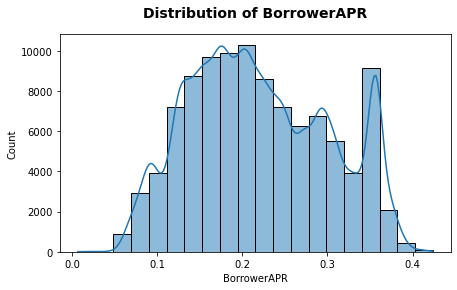

In [24]:
# plot distribution of BorrowerAPR
plt.figure(figsize = [7, 4])
sb.histplot(data = loans, x = 'BorrowerAPR', bins = 20, kde = True, color = sb.color_palette()[0])
plt_title('Distribution of BorrowerAPR');

`BorrowerAPR`: Although the distribution looks a little left skewed, with peaks on the right giving a multimodal distribution, the distribution is quite close to a normal distribution. It will be intersting to know what is responsible for the peaks on the left of the margin, which happens to be among the highest APRs borrowers would not desire.

Next, the distribution of Term column is observed.

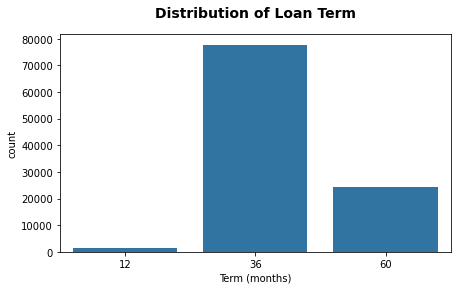

In [25]:
# plot distribution of Term
plt.figure(figsize = [7, 4])
sb.countplot(data = loans, x = 'Term', color = sb.color_palette()[0])
plt_title('Distribution of Loan Term')
plt.xlabel("Term (months)");

`Term` indicates a large number of borrowers got a 36 month term when compared with the number of those who got 60 month terms, which allows for more time resulting in lower repayment option. Can the reason why this is so be seen from it's relationship with BorrowerAPR?

Next, the distribution of LendYield column is observed.

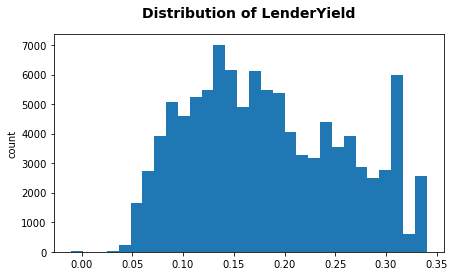

In [26]:
# plot distribution of LenderYield
plt.figure(figsize = [7, 4])
plt.hist(data = loans, x = 'LenderYield', bins = 30)
plt_title('Distribution of LenderYield')
plt.ylabel('count');

`LenderYield` is expected to look quite similar to the distribution of BorrowerAPR. Reason being that that it makes up a good portion of the BorrowerAPR. Having similar peaks on the right could indicate the the peaks on the BorrowerAPR originated from the LenderYield. Therefore, will it be be fine to consider Lender Yeild in place of BorrowerAPR when looking at relationship with other variables?. This shared pattern with BorrowerAPR will be explored further in bivariate plot.

Next, the distribution of BorrowerState column is observed.

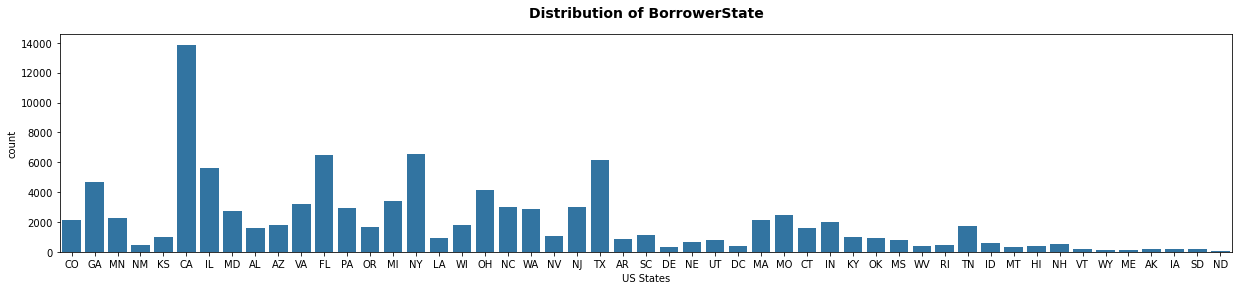

In [27]:
# plot distribution of Borrower state
plt.figure(figsize = [21, 4])
sb.countplot(data = loans, x = 'BorrowerState', color = sb.color_palette()[0])
plt_title('Distribution of BorrowerState')
plt.xlabel("US States");

The `BorrowerState` column contains 51 categorical entries, which will be too much on a plot. A new feature named `BorrowerRegion`, based on the US Census Bureau-designated regions will be engineered. Once done, this new feature will contain four regions, namely: Northest, Midwest, South and West.

In [28]:
us_regions = {'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
              'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
              'South': ['DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
              'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
             }

# create column BorrowerRegion with help of a custom function
loans['BorrowerRegion'] = loans.BorrowerState.apply(lambda x: muf.find_key_once(us_regions, x))

# check new feature values
loans.BorrowerRegion.unique()

array(['West', 'South', 'Midwest', 'Northeast'], dtype=object)

In [29]:
# move BorrowerRegion column next to Borrowerstate
BorrowerState_loc = loans.columns.get_loc("BorrowerState")
col = loans.pop("BorrowerRegion")
loans.insert(BorrowerState_loc+1, col.name, col)

# verify column position
list(loans.columns)

['Term',
 'BorrowerAPR',
 'LenderYield',
 'BorrowerState',
 'BorrowerRegion',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'IncomeRange',
 'IncomeVerifiable',
 'TotalProsperLoans',
 'Recommendations']

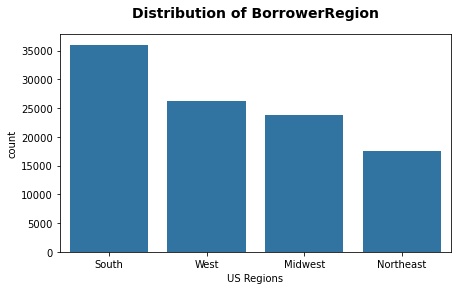

In [30]:
# plot distribution of BorrowerRegion
plt.figure(figsize = [7, 4])
region_order = loans.BorrowerRegion.value_counts().index
sb.countplot(data = loans, x = 'BorrowerRegion', order = region_order, color = sb.color_palette()[0])
plt_title('Distribution of BorrowerRegion')
plt.xlabel("US Regions");

`BorrowerRegion` appears to follow the order of the US Censors of 2020 (also same since 1990) in regards to population size, where the South is largest, folled by the West, then the Midwest, before the Northeast. The distribution being inline with population size indicates a fair spread of borrowers.

Next, the distribution of IsBorrowerHomeowner column is observed.

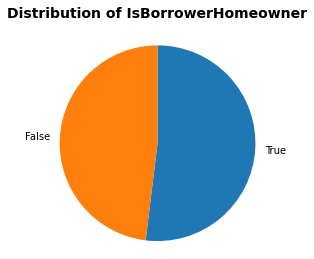

In [31]:
# plot distribution of IsBorrowerHomeowner
home_counts = loans.IsBorrowerHomeowner.value_counts()
plt.pie(home_counts, labels = home_counts.index, startangle = 90, counterclock = False)
plt.axis('square')
plt_title('Distribution of IsBorrowerHomeowner');

`IsBorrowerHomeowner` looks almost evenly distributed, which indicate fair consideration of borrowers who are owners and non-owners of homes.

Next, the distribution of CreditScoreRangeLower and CreditScoreRangeUpper columns is observed together.

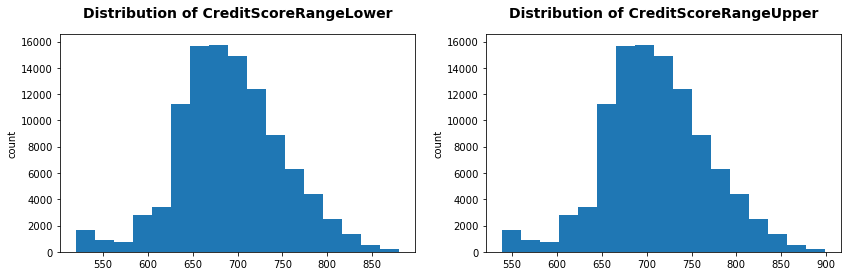

In [32]:
# plot distribution of CreditScoreRangeLower and CreditScoreRangeUpper
plt.figure(figsize = [14, 4])

# left plot CreditScoreRangeLower
plt.subplot(1, 2, 1)
plt.hist(data = loans, x = 'CreditScoreRangeLower', bins = 17)
plt_title('Distribution of CreditScoreRangeLower')
plt.ylabel('count');

# right plot CreditScoreRangeUpper
plt.subplot(1, 2, 2)
plt.hist(data = loans, x = 'CreditScoreRangeUpper', bins = 17)
plt_title('Distribution of CreditScoreRangeUpper')
plt.ylabel('count');

`CreditScoreRangeLower` and `CreditScoreRangeUpper` both have similar unimodal distribution. Although increaesing the bins more than the number curently used, splits the distribution into two groups where the global maximum is on the distribution on the right. Credit scores are more meaningfull when put into groups using a model such as the Fair Isaac Corporation (FICO) model. More information about FICO can be found online [here](https://www.experian.com/blogs/ask-experian/infographic-what-are-the-different-scoring-ranges/)

FicoClass is created from the `CreditScoreRangeLower` and `CreditScoreRangeUpper`. FicoClass is made up of 5 FICO model credit score classes (Poor, Fair, Good, Very Good, Exceptional) derived by classifying the average of CreditScoreRangeLower and CreditScoreRangeUpper per row.

After the column is created, it is converted to an ordered class.

In [33]:
# create new feature with average of CreditScoreRangeLower and CreditScoreRangeUpper
score_list = (loans.CreditScoreRangeLower + loans.CreditScoreRangeUpper) / 2
loans.loc[:,'FicoClass'] = score_list.apply(muf.get_fico)

# verification
loans.FicoClass.unique()

array(['Fair', 'Good', 'Exceptional', 'Very Good', 'Poor', None],
      dtype=object)

In [34]:
# move FicoClass column close to CreditScoreRangeUpper for organisation
loc = loans.columns.get_loc("CreditScoreRangeUpper")
col = loans.pop("FicoClass")
loans.insert(loc+1, col.name, col)

# verify FicoClass column position
list(loans.columns)

['Term',
 'BorrowerAPR',
 'LenderYield',
 'BorrowerState',
 'BorrowerRegion',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FicoClass',
 'IncomeRange',
 'IncomeVerifiable',
 'TotalProsperLoans',
 'Recommendations']

In [35]:
# create fico ordered class and change FicoClass data type
fico_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
Fico = pd.api.types.CategoricalDtype(ordered = True, categories = fico_order)
loans.FicoClass = loans.FicoClass.astype(Fico)

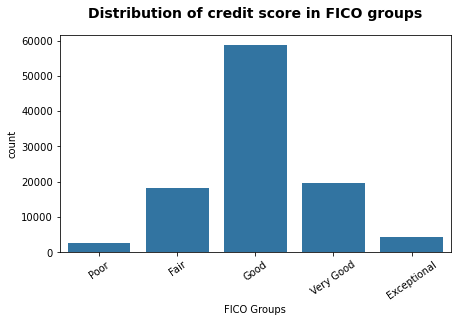

In [36]:
# plot new distribution of FicoClass
plt.figure(figsize = [7, 4])
sb.countplot(data = loans, x = 'FicoClass', color = base_color)
plt_title('Distribution of credit score in FICO groups')
plt.xticks(rotation = 35)
plt.xlabel("FICO Groups");

From the plot of the distribution of credit scores put into FICO classes (FicoClass), it can be seen that most borrowers where in the FICOClass Good. This makes the distribution of the frequency plot of CreditScoreRangeLower and CreditScoreRangeUpper clearer.

Next, the distribution of IncomeRange column is observed.

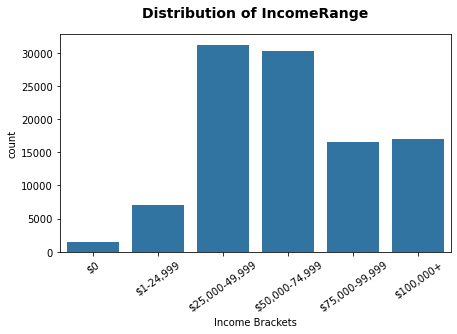

In [37]:
# plot distribution of IncomeRange
plt.figure(figsize = [7, 4])
sb.countplot(data = loans, x = 'IncomeRange', color = base_color)
plt_title('Distribution of IncomeRange')
plt.xticks(rotation = 35)
plt.xlabel("Income Brackets");

`IncomeRange` indicates an intersting pattern where most borrowers come from the two middle income class - \\$25,499 - 49,999 and \\$50,000-74,999. What would have motivated such pattern? Is it that their BorrowerAPR is better (closer to zero) when compared to the other two lower and higher income classes? Are there, combination of other reasons, such as owning or not owning a house that could aid a better BorrowerAPR?

Next, the distribution of IncomeVerifiable column is observed.

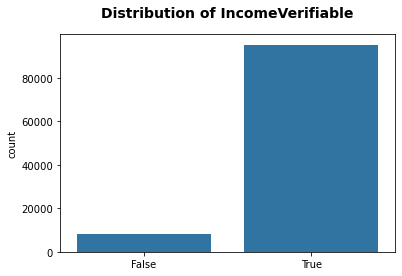

In [38]:
# plot distribution of IncomeVerifiable
sb.countplot(data = loans, x = 'IncomeVerifiable', color = sb.color_palette()[0])
plt_title('Distribution of IncomeVerifiable')
plt.xlabel("");

`IncomeVerifiable` indicates a very significant number of the borrowers when those whose income could be verified. Although there are borrowers whose income could not be verified as indicated in the distribution, observing the nature of the BorrowerAPR of the two classes of borrowers might shed more light on the pattern observed here.

Next, the distribution of EmployementStatus is observed.

In [39]:
# yscale ticks and labels for frequency transformations below
ticks = [1, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
labels = ['{}'.format(v) for v in ticks]

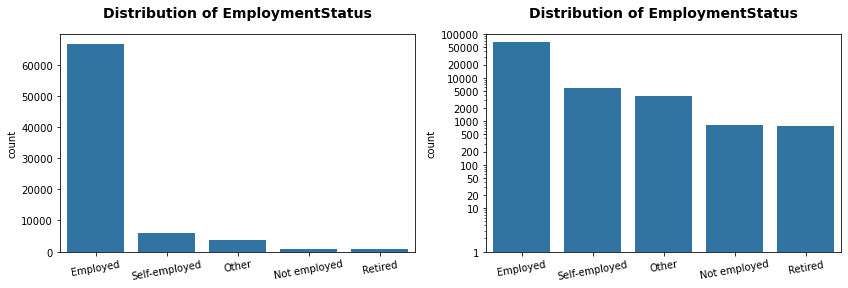

In [40]:
# plot distribution of EmploymentStatus
plt.figure(figsize = [14, 4])

plt.subplot(1, 2, 1)
loans_sub = loans[~loans['EmploymentStatus'].isin(['Full-time','Part-time'])]
order = loans_sub.EmploymentStatus.value_counts().index
sb.countplot(data = loans_sub, x = 'EmploymentStatus', color = sb.color_palette()[0], order = order)
plt_title('Distribution of EmploymentStatus')
plt.xticks(rotation = 10)
plt.xlabel("");

plt.subplot(1, 2, 2)
loans_sub = loans[~loans['EmploymentStatus'].isin(['Full-time','Part-time'])]
order = loans_sub.EmploymentStatus.value_counts().index
sb.countplot(data = loans_sub, x = 'EmploymentStatus', color = sb.color_palette()[0], order = order)
plt.yscale('log')
plt.yticks(ticks, labels)
plt_title('Distribution of EmploymentStatus')
plt.xticks(rotation = 10)
plt.xlabel("");

As can be seen from the two plots (left and right), the y-scale transformation applied to right plot makes it more better to analyse.

`EmploymentStatus` shows a significant disparity between Employed class and the other classes. It's not so suprising second highest class in this frequency plot is Self-employed. One thing both have in common is that this two class of borrowers are income earners. It will be nice to compare them in regards to their BorrowerAPR. Another interesting pattern, the almost equal count for "Not employed" and "Retired class". Although they both share a common attribute of not being employed, retired people earn income while people not employed do not earn income. One would have expected the count of retired to be more than those not employed. Although both are actually very insignificant compared to the count of Employed. Again, a look at the BorrowAPR together with these could give more insight.

Next, the distribution of TotalPrsoperLoans column is observed.

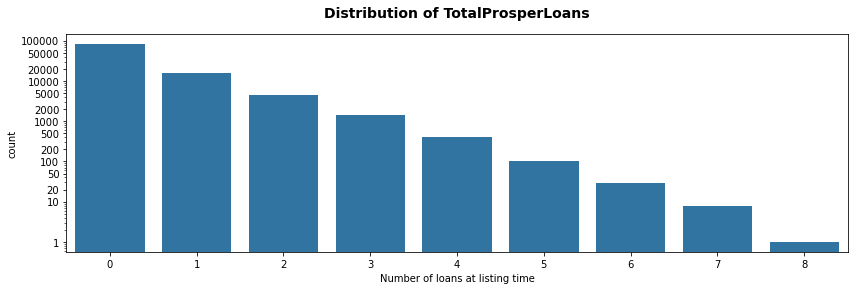

In [41]:
# plot distribution of TotalProsperLoans
plt.figure(figsize = [14, 4])
sb.countplot(data = loans, x = 'TotalProsperLoans', color = sb.color_palette()[0])
plt_title('Distribution of TotalProsperLoans')
plt.yscale('log')
plt.yticks(ticks, labels)
plt.xlabel("Number of loans at listing time");

Similar to the plot above, a transformation is used here also for the same reason as above.

`TotalProsperLoans` shows a clear decline in the count of borrowers as the number of prosper loan increases. What insight can BorrowerAPR give to explain this? Does the number of prosper loans taken affect the BorrowerAPR?

Next, the distribution of Recommendations column is observed.

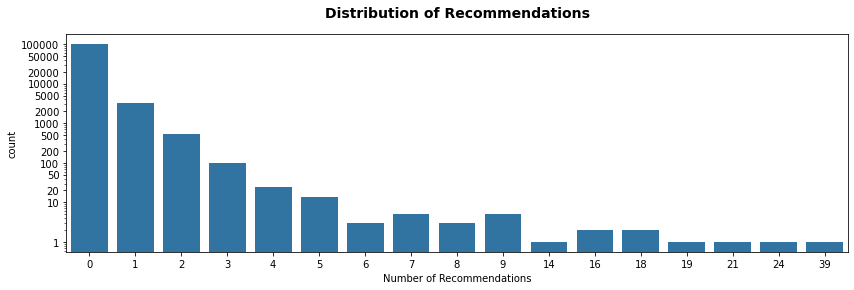

In [42]:
# plot distribution of Recommendations
plt.figure(figsize = [14, 4])
sb.countplot(data = loans, x = 'Recommendations', color = sb.color_palette()[0])
plt_title('Distribution of Recommendations')
plt.yscale('log')
plt.yticks(ticks, labels)
plt.xlabel("Number of Recommendations");

`Recommendations` indicates most of the borrowers did not have recommendations. It also shows recommendation as not being a strong condition for the borrowers when compared to some other variables earlier seen. This being as it seems, it becomes interesting to see a number of borrowers (about 20 in the plot) had 4 and above recommendations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Some of the variables, which where category type had a disproportionate gap between the classes with the highest count and the other class. This led to plots not being able to accomondate the big gap between highest count and low count. To solve this, a log transformation was done on the yscale (count) to bring these variables member classes into alogorythmic range that will make them visible on the plot. Affect variables are: `EmploymentStatus`, `TotalProsperLoans` and `Recommendations`.

`CreditScoreRangeLower` and `CreditScoreRangeUpper` distributions look quite unsual when the bins are above 17. The distribution becomes bimodal, giving the impression of a break in data entry for some period in time. The distribution become closer to a normal one when the bins are 17 and a bit below.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Before ploting the univariate plots, some data cleaning was performed to remove to reduce noise and bias in some ways. Entry for some variables (e.g. `IncomeRange`) where changed and some (meaningless and NAN entry rows) removed. This reduced the total number of rows from 113,937 to 103,623 rows.

For better exploration, a new categorical variable named FicoCLass (based on the FICO credit score model) was created from the combination of CreditScoreRangeLower and CreditScoreRangeUpper. This variable is made up five classes, namely: Poor, Fair, Good, Very Good and Exceptional. 

A new variable `BorrowerRegion` made up of four categorical classes was engineered from `BorrowerState` variable made up of 51 categorical classess. This was done intuition and better visualization.

## Bivariate Exploration

In this part of the exploration the features introduced in the univariate exploration above is explored with a plot between the target variable `BorrowerAPR` and each variable. This is to see the interactions between each in regards to how they vary BorrowerAPR. The y-axis is used always as the axis of the target variable.

#### `BorrowerAPR` and `Term` variables

A look at the relationship between BorrowerAPR and Term variables to understand the pattern observed in the frequency distribution of Term variable.

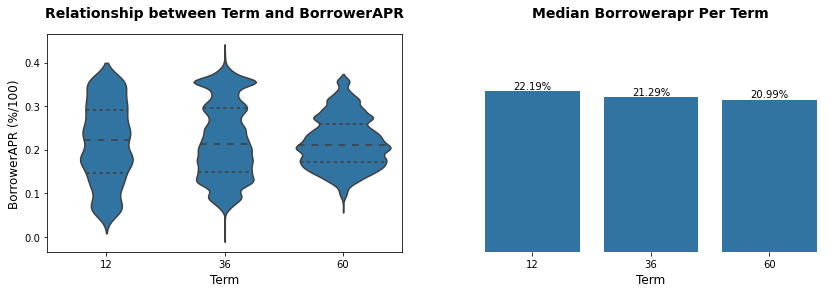

In [43]:
# violin and median bar plots for the relationship between BorrowerAPR and Term
violin_bar(loans, 'Term', 'BorrowerAPR', lim=(0.000, 0.300))

A the plot above on the right shows the median BorrowerAPR of the 12 month loan term to be higher than that of 36 month and 60 month term. A lower APR is a better deal, and this could be the reason there are significantly more borrowers having 36 month and 60 months term as observed from their frequency distribution. 

#### `LenderYield` and `Term` variables
Since LenderYield and BorrowerAPR had quite similar frequency distribution, do they have the same relationship with Term variable? A comparison of their effect on Term variable is observed below.

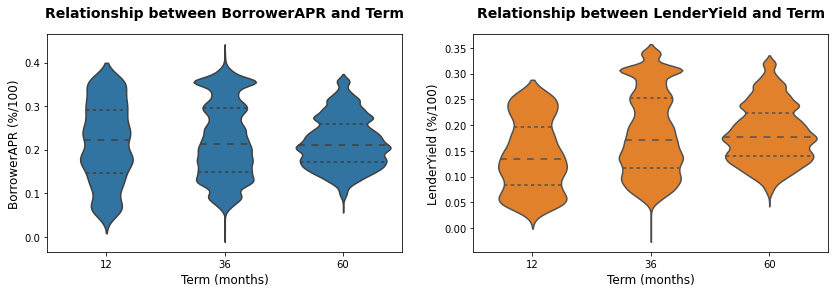

In [44]:
# plot relationship between LenderYield and Term
plt.figure(figsize = [14, 4])

# left plot
plt.subplot(1, 2, 1)
sb.violinplot(data = loans, x = 'Term', y = 'BorrowerAPR',
              inner = 'quartile', color = base_color)
plt_title('Relationship between BorrowerAPR and Term')
plt.xlabel('Term (months)', fontsize = f_size)
plt.ylabel('BorrowerAPR (%/100)', fontsize = f_size);

# right plot
plt.subplot(1, 2, 2)
sb.violinplot(data = loans, x = 'Term', y = 'LenderYield',
              inner = 'quartile', color = sb.color_palette()[1])
plt_title('Relationship between LenderYield and Term')
plt.xlabel('Term (months)', fontsize = f_size)
plt.ylabel('LenderYield (%/100)', fontsize = f_size);

The plot above shows BorrowerAPR and LenderYield do not have similar effect on Term. Apart from the distribution of the 60 month term, the other terms have different distributions in regards to BorrowerAPR and LenderYeild. Also, LenderYield median for 12 month Term is clearly lower than that of 36 and 60 months Terms while the BorrowerAPR median of the 12 month term is higher than that of 36 and 60 months Terms. Although LenderYield makes up a part of BorrowerAPR, both exhibit diffrent patterns here unlike their respective frequency distributions. Therefore, to consider LenderYeild in place of BorrowerAPR will most like be a wrong choice. The similar right side peak seen earlier on their frequency distributions can be observe at the top of the 36 months term in the left and right plots above.

#### `BorrowerAPR` and `LenderYield` variables
What is the relationship between BorrowerAPR and LenderYield? Is there a correlation, since both seem to have similar frequency distribution?

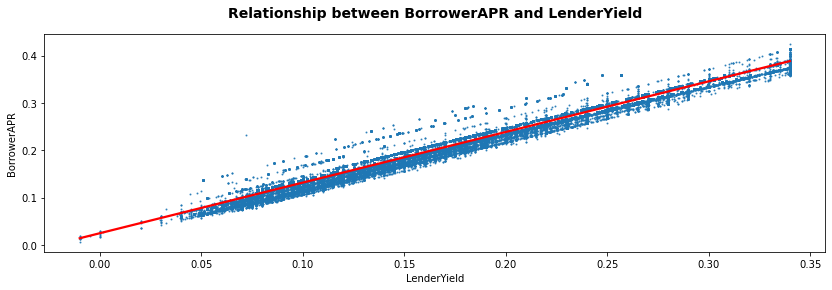

In [45]:
# plot relationship between BorrowerAPR and LenderYield
plt.figure(figsize = [14, 4])
sb.regplot(data = loans, x = 'LenderYield', y = 'BorrowerAPR', fit_reg = True,
          line_kws = {'color':'red'}, scatter_kws = {'s': 1})
plt_title('Relationship between BorrowerAPR and LenderYield');

A positive correlation between the two variables as observed above is not suprising because LenderYield forms part of BorrowerAPR. *Note: jitter of 0.3 on the x-axes is applied to reduce overlapping of points and transparency is used to highlight concentration of points due to dataset size.*

#### `BorrowerAPR` and `BorrowerRegion`
What is the relationship between BorrowerAPR and the US region of a borrower?  

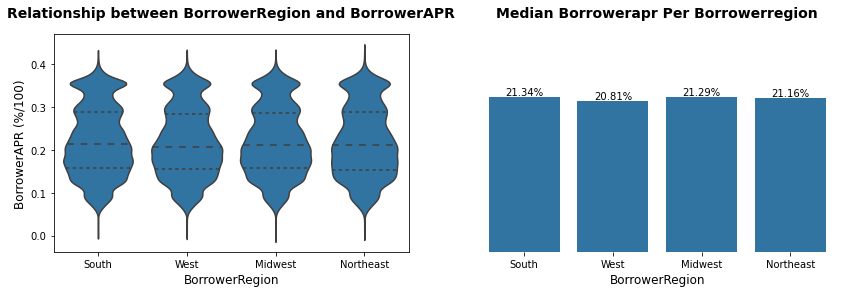

In [46]:
# violin and median bar plots for relationship between BorrowerAPR and BorrowerRegion
violin_bar(loans, 'BorrowerRegion', 'BorrowerAPR', order = region_order, lim=(0.000, 0.300))

# plt.figure(figsize = [14, 4])

# # left plot
# plt.subplot(1, 2, 1)
# sb.violinplot(data = loans, x = 'BorrowerRegion', y = 'BorrowerAPR',
#               inner = 'quartile', order = region_order, color = base_color)
# plt_title('Relationship between BorrowerAPR and BorrowerRegion')
# plt.xlabel('BorrowerRegion')
# plt.ylabel('BorrowerAPR (%)');

# # right plot
# plt.subplot(1, 2, 2)
# region_median_APR = loans.groupby('BorrowerRegion').median()['BorrowerAPR']
# g = sb.barplot(x = region_median_APR.index, y = region_median_APR.values, order = region_order, color = base_color)

# # create bar annotation
# i = 0
# for idx, value in region_median_APR.items():
#     g.text(i, value+0.005, f'{round(value, 4)}%', color='black', ha="center")
#     i += 1

# plt_title('Median BorrowerAPR Per BorrowerRegion')
# plt.xlabel('BorrowerRegion')
# plt.box(False)
# plt.tick_params(labelleft = False, left = False)
# plt.ylim((0.000, 0.300));

From the plot above, the region a Borrower is seem not to matter in terms of BorrowerAPR. Although, a careful observation of the median BorrowerAPR as shown on the right plot, show Borrowers from the Northeast have slightly better (i.e., lower) median BorrowerAPR.

#### `BorrowerAPR` and `IsBorrowerHomeowner`
What is the relationship between BorrowerAPR and Borrowers who are home owners?

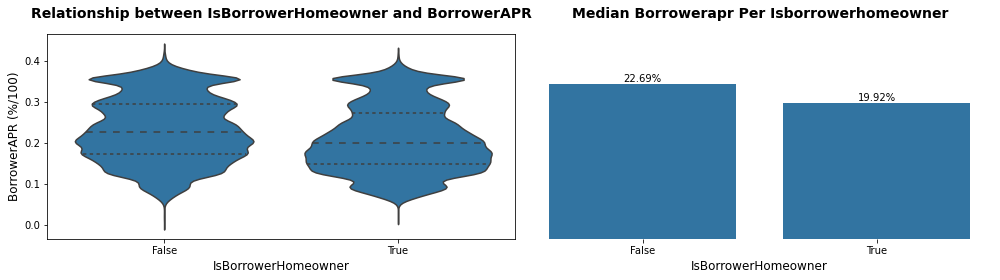

In [47]:
# violin and median bar plots for the relationship between BorrowerAPR and IsBorrowerHomeowner
violin_bar(loans, 'IsBorrowerHomeowner', 'BorrowerAPR', lim=(0.000, 0.300), tight = True)

As can be seen from the plots above, borrowers who own a home *(IsBorrowerHomeowner = 'True')*, have better BorrowerAPR. Although the spread of BorrowerAPR across home owners and none home owners are quite close, the IQR of home owners BorrowerAPR is lower than that of none home owners. The difference in the median can be seen from the right plot.

#### `BorrowerAPR` and `FicoClass`
What is the relationship between BorrowerAPR and FicoClass?

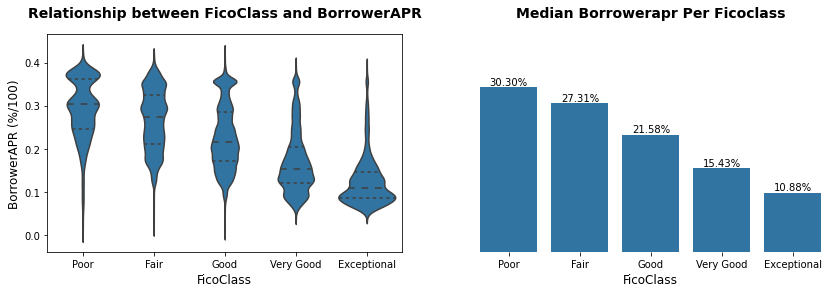

In [48]:
# violin and median bar plots for the relationship between BorrowerAPR and FicoClass
violin_bar(loans, 'FicoClass', 'BorrowerAPR', lim=(0.000, 0.400))

Here, it obvious that the better the class (i.e., moving right) the lower the BorrowerAPR. More of the borrowers (higher count) in the middle class (i.e., Good) as seen in the violine plot distribution  got lower BorrowerAPR while a lesser count got higher BorrowerAPR.

The Poor and Fair FicoClass distribution are around 0.2 and 0.4, which is the highest of BorrowerAPR. As can be seen from the plot on the left, these borrowers with not so good credit rating still get loans but at a high BorrowerAPR.

#### `BorrowerAPR` and `IncomeRange`
What is the relationship between BorrowerAPR and IncomeRange?

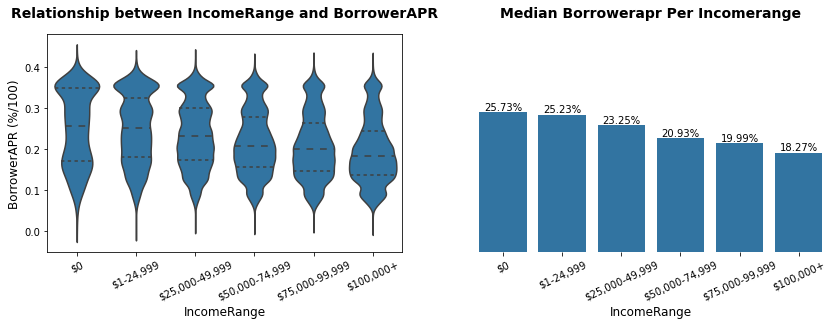

In [49]:
# violin and median bar plots for the relationship between BorrowerAPR and IncomeRange
violin_bar(loans, 'IncomeRange', 'BorrowerAPR', lim=(0.000, 0.400), xtick_rot = 25)


# plt.figure(figsize = [14, 4])

# # left plot
# plt.subplot(1, 2, 1)
# sb.violinplot(data = loans, x = 'IncomeRange', y = 'BorrowerAPR',
#               inner = 'quartile', color = base_color)
# plt_title('Relationship between BorrowerAPR and Income Range')
# plt.xlabel('IncomeRange')
# plt.xticks(rotation = 45)
# plt.ylabel('BorrowerAPR (%)');

# # right plot
# plt.subplot(1, 2, 2)
# income_median_APR = loans.groupby('IncomeRange').median()['BorrowerAPR']
# g = sb.barplot(x = income_median_APR.index, y = income_median_APR.values, color = base_color)

# # create bar annotation
# i = 0
# for idx, value in income_median_APR.items():
#     g.text(i, value+0.005, f'{round(value, 4)}%', color='black', ha="center")
#     i += 1

# plt_title('Median BorrowerAPR for Income Range')
# plt.xlabel('IncomeRange')
# plt.box(False)
# plt.tick_params(labelleft = False, left = False)
# plt.xticks(rotation = 45)
# plt.ylim((0.000, 0.400));

The plot shows a relationship where the BorrowerAPR gets lower as the income rises. That is, the higher the income class, the better the BorrowerAPR that borrower is likely to get. It is also observable that there were more borrowers who earned $50,000 and got low BorrowerAPR compared to those in thse same class who got higher BorrowerAPR.

#### `BorrowerAPR` and `IncomeVerifiable`
What happens to the BorowerAPR if the income is verifiable or not?

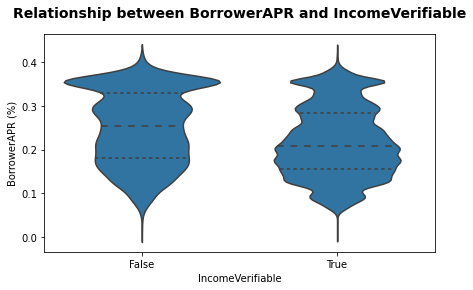

In [50]:
# plot the relationship between BorrowerAPR and IncomeVerifiable
plt.figure(figsize = [7, 4])

sb.violinplot(data = loans, x = 'IncomeVerifiable', y = 'BorrowerAPR',
              inner = 'quartile', color = base_color)
plt_title('Relationship between BorrowerAPR and IncomeVerifiable')
plt.xlabel('IncomeVerifiable')
plt.ylabel('BorrowerAPR (%)');

When income is verifiable, the BorrowerAPR is better than when income can not be verified. Although there are Borrowers whose income are not verifiable who got low BorrowerAPR like those whose income are verifiable, more of those who got better BorrowerAPR are those whose income are verifiable.

#### `BorrowerAPR` and `TotalProsperLoans`
What is the median BorrowerAPR for those who had previous prosper loan?

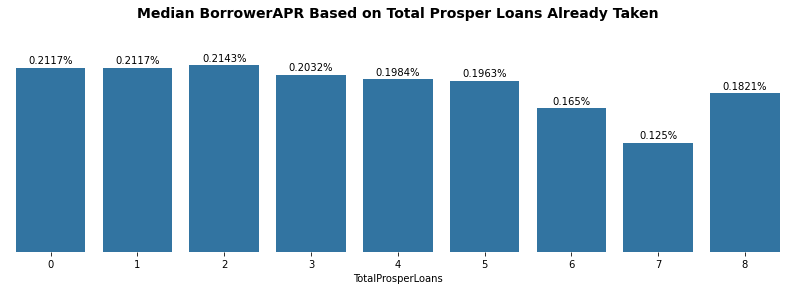

In [51]:
# plot the relationship between BorrowerAPR and TotalProsperLoans
plt.figure(figsize = [14, 4])
tpl_median_APR = loans.groupby('TotalProsperLoans').median()['BorrowerAPR']
g = sb.barplot(x = tpl_median_APR.index, y = tpl_median_APR.values, color = base_color)

# create bar annotation
i = 0
for idx, value in tpl_median_APR.items():
    g.text(i, value+0.005, f'{round(value, 4)}%', color='black', ha="center")
    i += 1

plt_title('Median BorrowerAPR Based on Total Prosper Loans Already Taken')
plt.xlabel('TotalProsperLoans')
plt.box(False)
plt.tick_params(labelleft = False, left = False)
plt.ylim((0.000, 0.250));

The pattern observed here is that the median borrower APR drops as the number of Prosper loans taken increases. The annomaly seen for the median of borrowers with 8 prosper loans can be traced to a count of 1, in the frequency distribution. Perharps if the count was a little more, the decreasing median pattern would have contnued. 

#### `BorrowerAPR` and `Recommendations`
What is the median BorrowerAPR for those who had Recommendations?

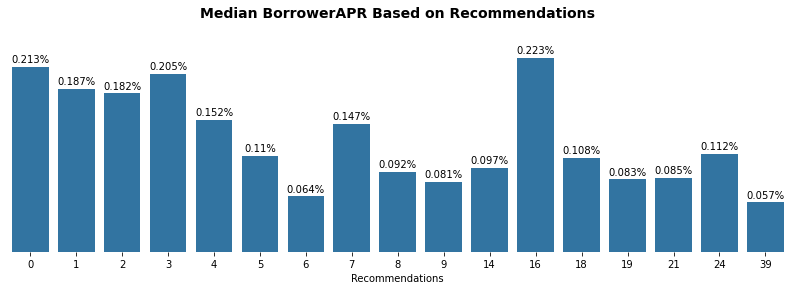

In [52]:
# plot the relationship between BorrowerAPR and Recommendations
plt.figure(figsize = [14, 4])
rec_median_APR = loans.groupby('Recommendations').median()['BorrowerAPR']
g = sb.barplot(x = rec_median_APR.index, y = rec_median_APR.values, color = base_color)

# create bar annotation
i = 0
for idx, value in rec_median_APR.items():
    g.text(i, value+0.005, f'{round(value, 3)}%', color='black', ha="center")
    i += 1

plt_title('Median BorrowerAPR Based on Recommendations')
plt.xlabel('Recommendations')
plt.box(False)
plt.tick_params(labelleft = False, left = False)
plt.ylim((0.000, 0.250));

There seem to be a form of decreasing pattern for BorrowerAPR as the number of recommendation increases up to 6 recommendations. Thereafter, there is no reasonable pattern observed.

#### `LenderYield` and `Recommendations`
Can LenderYeild show a more meaningful relationship with Recommendations?

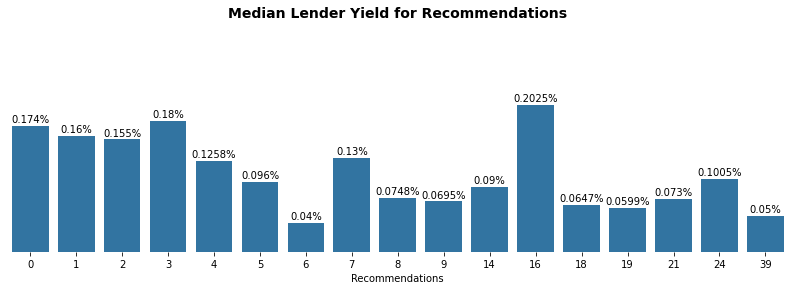

In [53]:
# plot the relationship between LenderYield and Recommendations
plt.figure(figsize = [14, 4])

rec_median_yeild = loans.groupby('Recommendations').median()['LenderYield']
g = sb.barplot(x = rec_median_yeild.index, y = rec_median_yeild.values, color = base_color)

# create bar annotation
i = 0
for idx, value in rec_median_yeild.items():
    g.text(i, value+0.005, f'{round(value, 4)}%', color='black', ha="center")
    i += 1

plt_title('Median Lender Yield for Recommendations')
plt.xlabel('Recommendations')
plt.box(False)
plt.tick_params(labelleft = False, left = False)
plt.ylim((0.000, 0.300));

There is no observable reasonable relationship or pattern better than what was observed from the relationship between BorrowerAPR and Recommendations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Plot of the relationship between BorrowerAPR and Term showed the 36 month and 60 month terms had better BorrowerAPR.

The region of the borrower did not seem to matter much as seen from the relationship between BorrowerAPR and BorrowerRegion. The four regions had Median APR around 0.21% when approximated, athough the Northeat was a little better than the other regions.

From the relationship between BorrowerAPR and IsBorrowerHomeowner home owners had better BorrowerAPR.

There was a clear difference between the median BorrowerAPR of borrowers whose credit score by FICO model are classed Excelent and those classed Poor, observerd from the relationship between BorrowerAPR and FicoClass.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

LenderYield which is part of BorrowerAPR, had lower median for 12 months compared to 36 months and 60 months Terms. But, for BorrowerAPR it was 12 months Term that was higher.
For another feature checked, there was no meaningful relationship.

## Multivariate Exploration

#### To get a good borrowerAPR, does the loan Term home owners and none home owners go for matter?

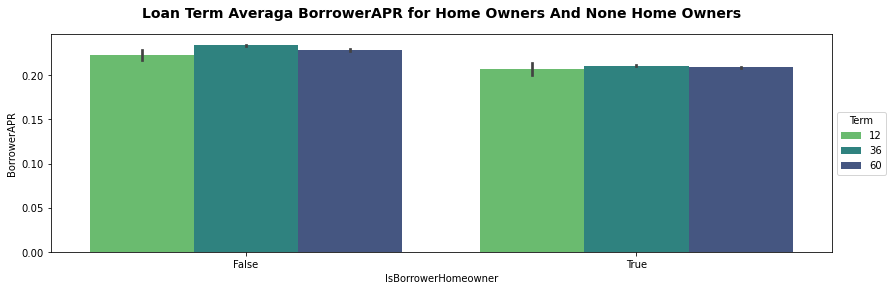

In [54]:
# barplot between IsBorrowerHomeowner, BorrowerAPR and Term
plt.figure(figsize = [14, 4])
ax = sb.barplot(data = loans, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',
                hue = 'Term', palette = 'viridis_r')
ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5), title = 'Term')
plt_title('Loan Term Averaga BorrowerAPR for Home Owners And None Home Owners')
plt.show()

From the plot above, both are like to get a good BorrowerAPR if they go for 12 Term loan

#### In what region do home owners and none home owners have a better BorrowerAPR

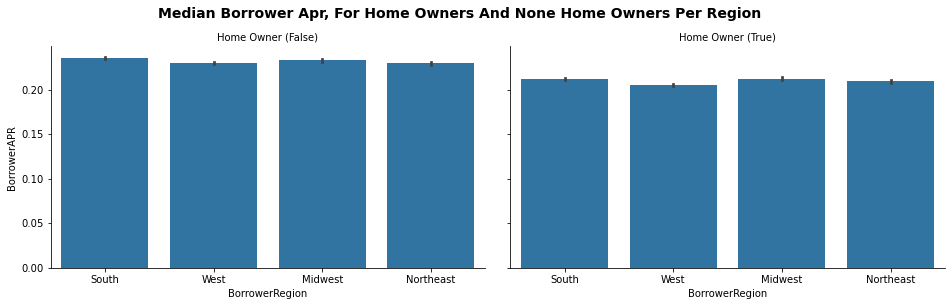

In [55]:
# Facet barplot between IsBorrowerHomeowner, BorrowerRegion, BorrowerAPR
g = sb.FacetGrid(data = loans, col = 'IsBorrowerHomeowner', col_wrap = 2, height = 4)
g.map(sb.barplot, 'BorrowerRegion', 'BorrowerAPR', order = region_order)
g.fig.set_size_inches(14, 4)
g.set_titles('Home Owner ({col_name})')
plt.suptitle('Median Borrower APR, for home owners and none home owners per region'.title(), y = 1.05, fontsize = 14, weight = 'bold')
plt.show()

None home owners in the West and Northeast regions got better BorrowerAPR than those in the Midwest and South.

Home owners in the West region got better BorrowerAPR than their counterparts in the South, Midwest and Northeast regions.

#### What can be observed about the borrowers in the FicoClass "Good" (i.e., those with mid credit score) who got high BorrowerAPR?

In [56]:
# set color for IsBorrowerHomeowner
is_home_pal = {IsBorrowerHomeowner: sb.color_palette()[1] if IsBorrowerHomeowner == False
            else base_color for IsBorrowerHomeowner in loans.IsBorrowerHomeowner.unique()}

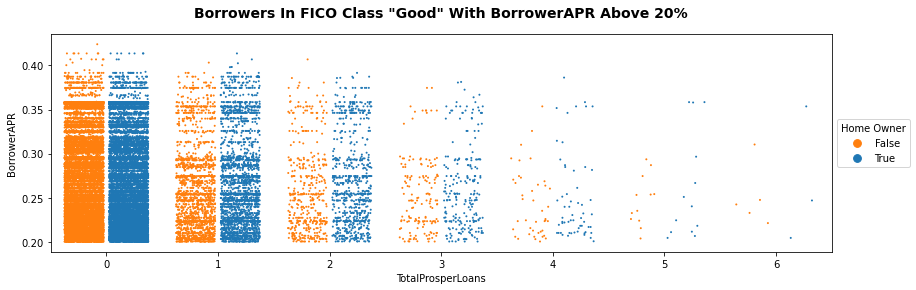

In [57]:
plt.figure(figsize = [14,4])
loans_sub = loans.query('FicoClass == "Good" & BorrowerAPR > 0.200')
# stripplot between TotalProsperLoans", "BorrowerAPR", "IsBorrowerHomeowner
ax = sb.stripplot(data = loans_sub, x = "TotalProsperLoans", y = "BorrowerAPR", hue = "IsBorrowerHomeowner",
                  palette = is_home_pal, dodge = True, size = 2, jitter = 0.35)
ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5), title = 'Home Owner')
plt_title('Borrowers In FICO Class "Good" With BorrowerAPR Above 20%')
plt.show()

Majority of the borrowers in this case, where first time borrowers who where not home owners as observed from the plot above. Also as observed from the plot below, these borrowers had income but their income range did not seem to matter much.

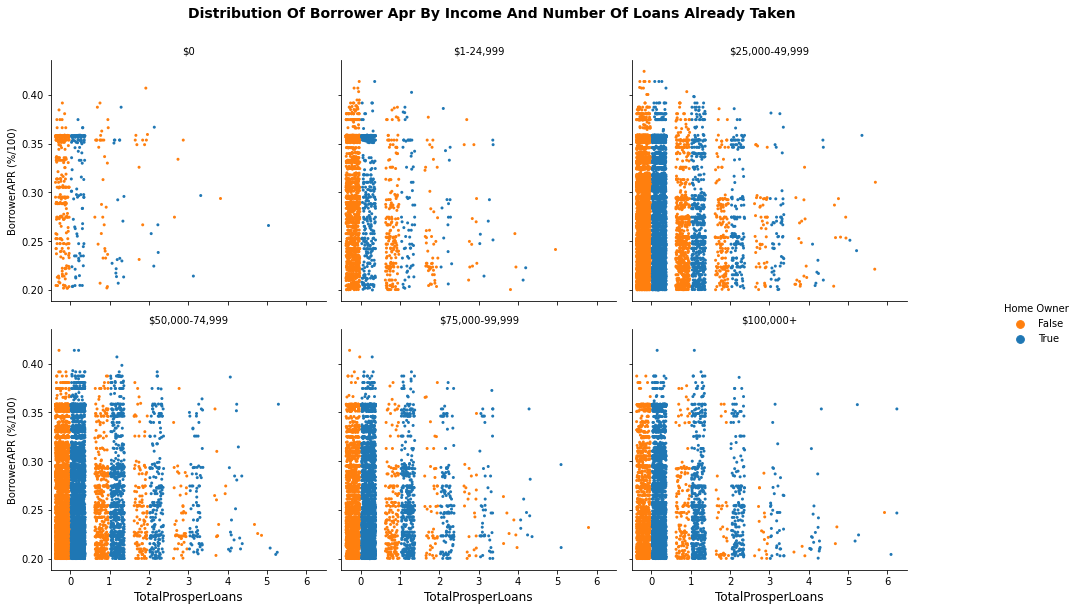

In [58]:
# FacetGrid stripplot between IncomeRange, IsBorrowerHomeowner, TotalProsperLoans and BorrowerAPR
g = sb.FacetGrid(data = loans_sub, col = 'IncomeRange', col_wrap = 3, height = 4)
g.map(sb.stripplot, 'TotalProsperLoans', 'BorrowerAPR', 'IsBorrowerHomeowner', size = 3, jitter = 0.35,
      palette = is_home_pal, dodge = True, hue_order = None, order = None)
g.set_titles('{col_name}')
g.add_legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5), title = 'Home Owner')
g.fig.set_size_inches(14, 8)
g.set_axis_labels('TotalProsperLoans', fontsize = 12)
plt.suptitle('Distribution of Borrower APR By Income and Number of Loans Already Taken'.title(), y = 1.05, fontsize = 14, weight = 'bold')
for ax in g.axes.flat:
    ax.set_ylabel('BorrowerAPR (%/100)')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From this multivatriate exploration, it was found the region home owners and none home owners comes from have observable effect on the BorrowerAPR.

Whether Borrowers classed as 'Good' in FICO classes also are first time borrowers or not, have observable impact on the BorrowerAPR.

### Were there any interesting or surprising interactions between features?

I was interesting that the income of first time borrowers classed as 'Good' in FICO classes did not have observable impact on their BorrowerAPR.

## Conclusions

This visual exploration of Prosper loans dataset with the aim of observing the effect of some features of interest on the BorrowerAPR, started out with preliminary data wrangling that involved the gathering and cleaning of original dataset in preparation for visual exploration.

The exploration proceeded to univariate, bivariate and then multivariate exploration stages, from where interesting insights where observed in the dataset as regards the interaction of BorrowerAPR - the target variable and 11 other features. Through the exploration, 2 new features - BorrowerRegion and FicoClass where engineered to make visualisation more insightful.

The frequency distribution of each feacture was observed using univariate plots i.e., histograms, barplots and scatter plots, that revealed unimodal and multi modal ditributions, also correlation. CreditScoreRangeLower and CreditScoreRangeUpper features were combined to engineer FicoClass feature for better visualization, While BorrowerState, due to it's size and being a category variable, was used to produce BorrowerRegion feature. Some of the Observations from the frequency distributions are:
   - Most borrowers had 36 month terms
   - Distribution of borrowers across the region followed the order of population size
   - Most of the borrowers had verifiable income
   - Most of which where employed
   - Majority were between the income bracket of \\$25,499 and \\$74,999
   - More than half, never had a prosper loan

The interaction between the target feature (BorrowerAPR) and other features of interest where then plotted with bivariate plots to observed their relationships. Observations include:
   - Borrowers having 60 months Term had lower BorrowerAPR than those having 12 months and 36 months Terms
   - Borrowers having 12 month Term had lower LenderYield that those having 36 months and 60 months Terms
   - BorrowerAPR and LenderYield had a possitive correlation
   - Home owners had lower BorrowerAPR compared to none home owners
   - BorrowerAPR decreases significatly as borrower credit score gets higher
   - BorrowerAPR decreases as income range increases
   - Those with verifiable income have lower BorrowerAPR 
   - As number of prosper loans taken by borrowers increases, BorrowerAPR reduces

Some interesting observations in the bivariate exploration stage led to questions such as: Why borrowers in the mid class had quite some count for borrowers who had BorrowerAPR above 0.200, and if the loan term had any effect on the BorrowerAPR of borrowers in different regions. Observations found include:
   - The income of first time borrowers in FICO group 'Good' who own or do not own homes, did not have observable effect on their BorrowerAPR
   - None home owners in the West and Northeast regions got lower BorrowerAPR while Home owners in the West region got lower BorrowerAPR than all their counterparts.
   
In conclusion, the observations where eye opening in regards to BorrowerAPR that borrowers got for prsoper loans. One would not have thought ordinarily that the Borrower's Annual Percentage Rate (APR) the borrowers got where variable depending, on certain factors. This exploration brings to light that factors like: owning or not owning a Home, region of the united states one lives, the income and if it is verifiable or not, the loan term and even number of prosper loans already taken and more that can be further explored from prosper loan dataset, have effect on the BorrowerAPR a borrower gets. 


In [59]:
# store final dataframe as csv file
loans.to_csv('loans_finale.csv', index = False)